# INTRODUCTION


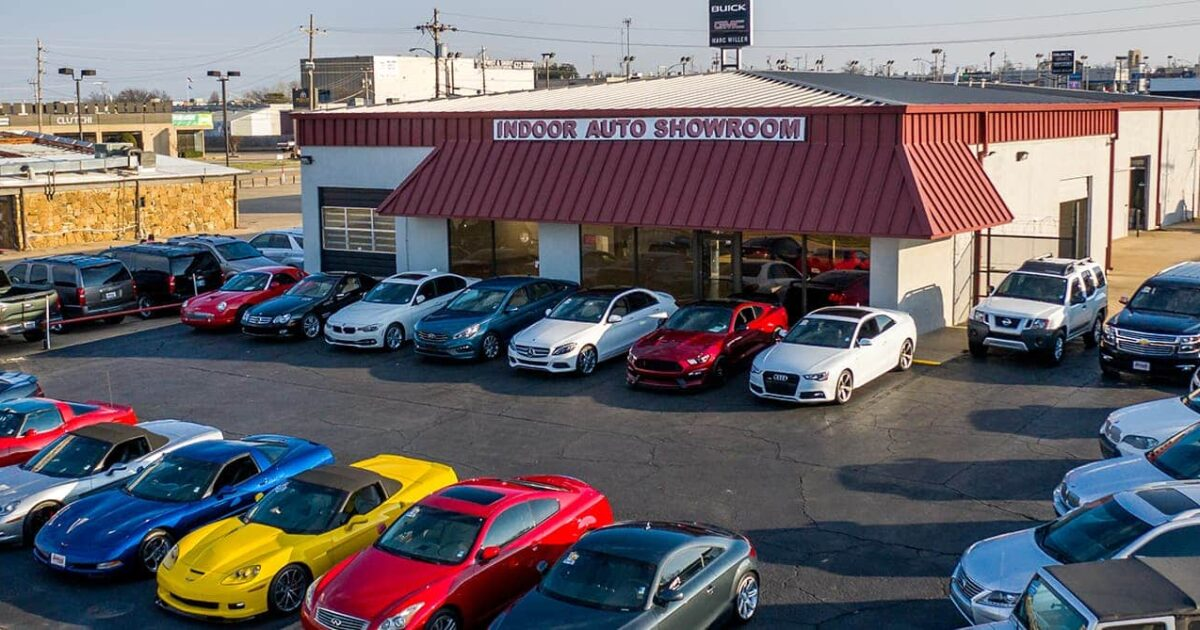

There has been a significant surge in the retail car purchasing process, whether it pertains to everyday use vehicles or luxury cars for leisure. Upholding robust sales performance enables dealerships to attain a competitive advantage, allure potential clientele, and position themselves as frontrunners in their respective markets.

The objective of this project is to scrutinize sales data from a dealership across a specified timeframe to extract insights into diverse facets of sales performance, customer inclinations, and market trends. Through extensive exploratory data analysis (EDA) techniques, the aim is to unearth valuable insights that can guide strategic decision-making, propel revenue expansion, and augment overall business efficacy.

# PROJECT OBJECTIVES
1. Determine the highest-selling car model.
2. Identify the salesperson who sold the highest number of cars.
3. Analyze the most preferred car brand.
4. Evaluate the commission rates.
5. Investigate the most favored buying dates.

# ABOUT THE DATASET

This dataset provides details on car transactions at a dealership throughout a year. It comprises the following fields:

-> Date: The date when the car sale occurred.

-> Salesperson: The sales representative responsible for the sale.

-> Customer Name: The buyer's name.

-> Car Make: The brand of the purchased vehicle.

-> Car Model: The specific model of the purchased car.

-> Car Year: The manufacturing year of the purchased car.

-> Sale Price: The price at which the car was sold, expressed in USD.

-> Commission Rate: The rate of commission allocated to the salesperson for the sale.

-> Commission Earned: The total commission earned by the salesperson for the sale.

In [1]:
## importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
## reading the data

df =pd.read_csv('car_sales_data.csv')
df.head()

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned
0,2022-08-01,Monica Moore MD,Mary Butler,Nissan,Altima,2018,15983,0.070495,1126.73
1,2023-03-15,Roberto Rose,Richard Pierce,Nissan,F-150,2016,38474,0.134439,5172.40
2,2023-04-29,Ashley Ramos,Sandra Moore,Ford,Civic,2016,33340,0.114536,3818.63
3,2022-09-04,Patrick Harris,Johnny Scott,Ford,Altima,2013,41937,0.092191,3866.20
4,2022-06-16,Eric Lopez,Vanessa Jones,Honda,Silverado,2022,20256,0.113490,2298.85


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500000 entries, 0 to 2499999
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Date               object 
 1   Salesperson        object 
 2   Customer Name      object 
 3   Car Make           object 
 4   Car Model          object 
 5   Car Year           int64  
 6   Sale Price         int64  
 7   Commission Rate    float64
 8   Commission Earned  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 171.7+ MB


In [4]:
df.describe()

,Car Year,Sale Price,Commission Rate,Commission Earned
count,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06
mean,2.015996e+03,3.001218e+04,9.998766e-02,3.001005e+03
std,3.739132e+00,1.154514e+04,2.887202e-02,1.481467e+03
min,2.010000e+03,1.000000e+04,5.000014e-02,5.013400e+02
25%,2.013000e+03,2.001900e+04,7.496450e-02,1.821710e+03
50%,2.016000e+03,3.000600e+04,1.000058e-01,2.741910e+03
75%,2.019000e+03,4.002200e+04,1.250065e-01,3.978142e+03
max,2.022000e+03,5.000000e+04,1.500000e-01,7.494530e+03


In [5]:
df.columns

Index(['Date', 'Salesperson', 'Customer Name', 'Car Make', 'Car Model',
       'Car Year', 'Sale Price', 'Commission Rate', 'Commission Earned'],
      dtype='object')

In [6]:
##changing date time data type
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
#extracting month and year from date 

df['Month'] =df['Date'].dt.month
df['Year'] =df['Date'].dt.year

In [8]:
## checking for the total sales per month over the period

monthly_sales_2022_2023 = df.groupby(['Year', 'Month'])['Sale Price'].sum()
sort = monthly_sales_2022_2023.groupby('Year').apply(lambda x: x.sort_values(ascending=False))
sort

Year  Year  Month
2022  2022  12       6385067556
            10       6378840202
            8        6354441192
            5        6354253868
            7        6348409539
            6        6162247177
            9        6138540711
            11       6129814538
2023  2023  3        6347385901
            1        6346868533
            4        6128938587
            2        5749952581
            5         205686470
Name: Sale Price, dtype: int64

#### Plot graph to determine the trend over year

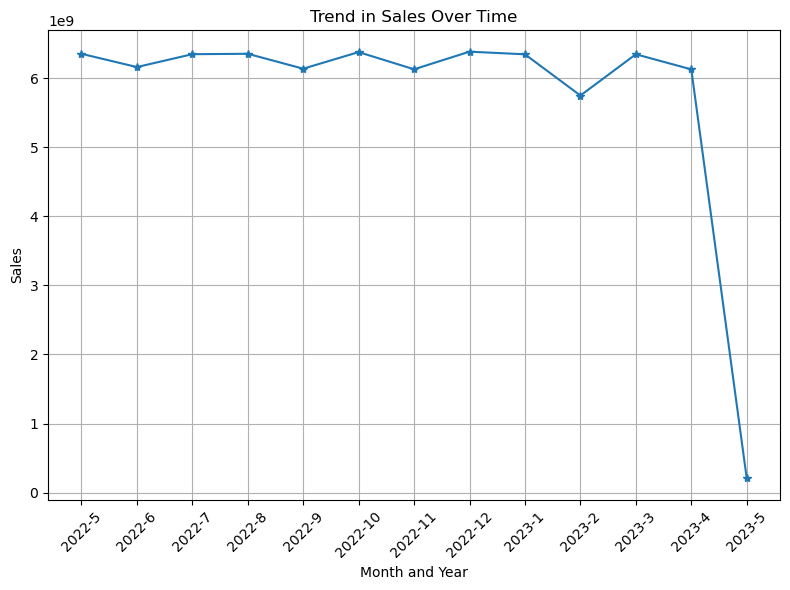

In [9]:
months_years = [(f"{year}-{month}", monthly_sales_2022_2023[(year, month)]) for year, month in sorted(monthly_sales_2022_2023.keys())]
plt.figure(figsize=(8,6))
plt.plot(*zip(*months_years),marker="*")
plt.title('Trend in Sales Over Time')
plt.xlabel('Month and Year')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

from the above plot we could infer that the maximum sales was in year 2023 in december month 

# Heatmap

In [10]:
print(df.corr())

                   Car Year  Sale Price  Commission Rate  Commission Earned  \
Car Year           1.000000   -0.000667        -0.000311          -0.000713   
Sale Price        -0.000667    1.000000         0.000474           0.779319   
Commission Rate   -0.000311    0.000474         1.000000           0.585176   
Commission Earned -0.000713    0.779319         0.585176           1.000000   
Month             -0.000744    0.000396        -0.000077           0.000290   
Year               0.000278    0.000283        -0.000071           0.000146   

                      Month      Year  
Car Year          -0.000744  0.000278  
Sale Price         0.000396  0.000283  
Commission Rate   -0.000077 -0.000071  
Commission Earned  0.000290  0.000146  
Month              1.000000 -0.816326  
Year              -0.816326  1.000000  


In [11]:
x=df[['Commission Earned', 'Commission Earned']].corr()
x

,Commission Earned,Commission Earned
Commission Earned,1.0,1.0
Commission Earned,1.0,1.0


<AxesSubplot:title={'center':'Correlation Heatmap between Commission Rate and Commission Earned'}>

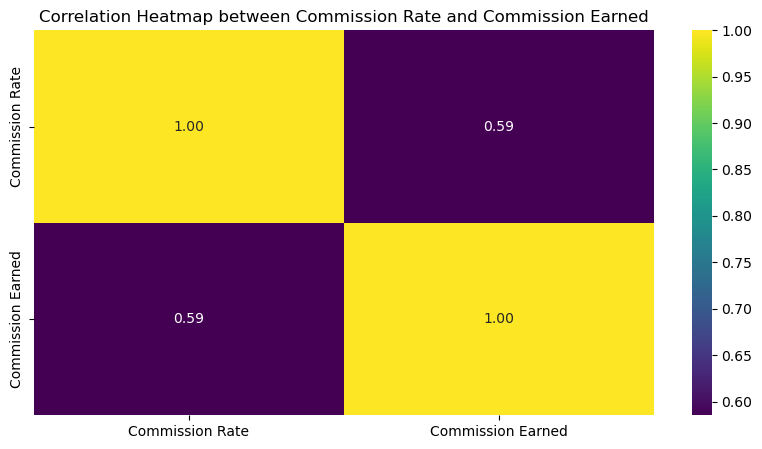

In [12]:
fig, axes = plt.subplots(1, 1, figsize=(10,5))
y=sns.heatmap(df[['Commission Rate', 'Commission Earned']].corr(), annot=True, cmap='viridis', fmt=".2f")
y.set_title('Correlation Heatmap between Commission Rate and Commission Earned')
y

A correlation value 1 indicates a perfect relationship between the two values indicating that if the commission rate increases efficiently then the commission earned also increases with the same efficiency. While the value 0.59 indicate a moderately linear relationship between the values.

#### Top 10 salesman and Bottom 10 salesman

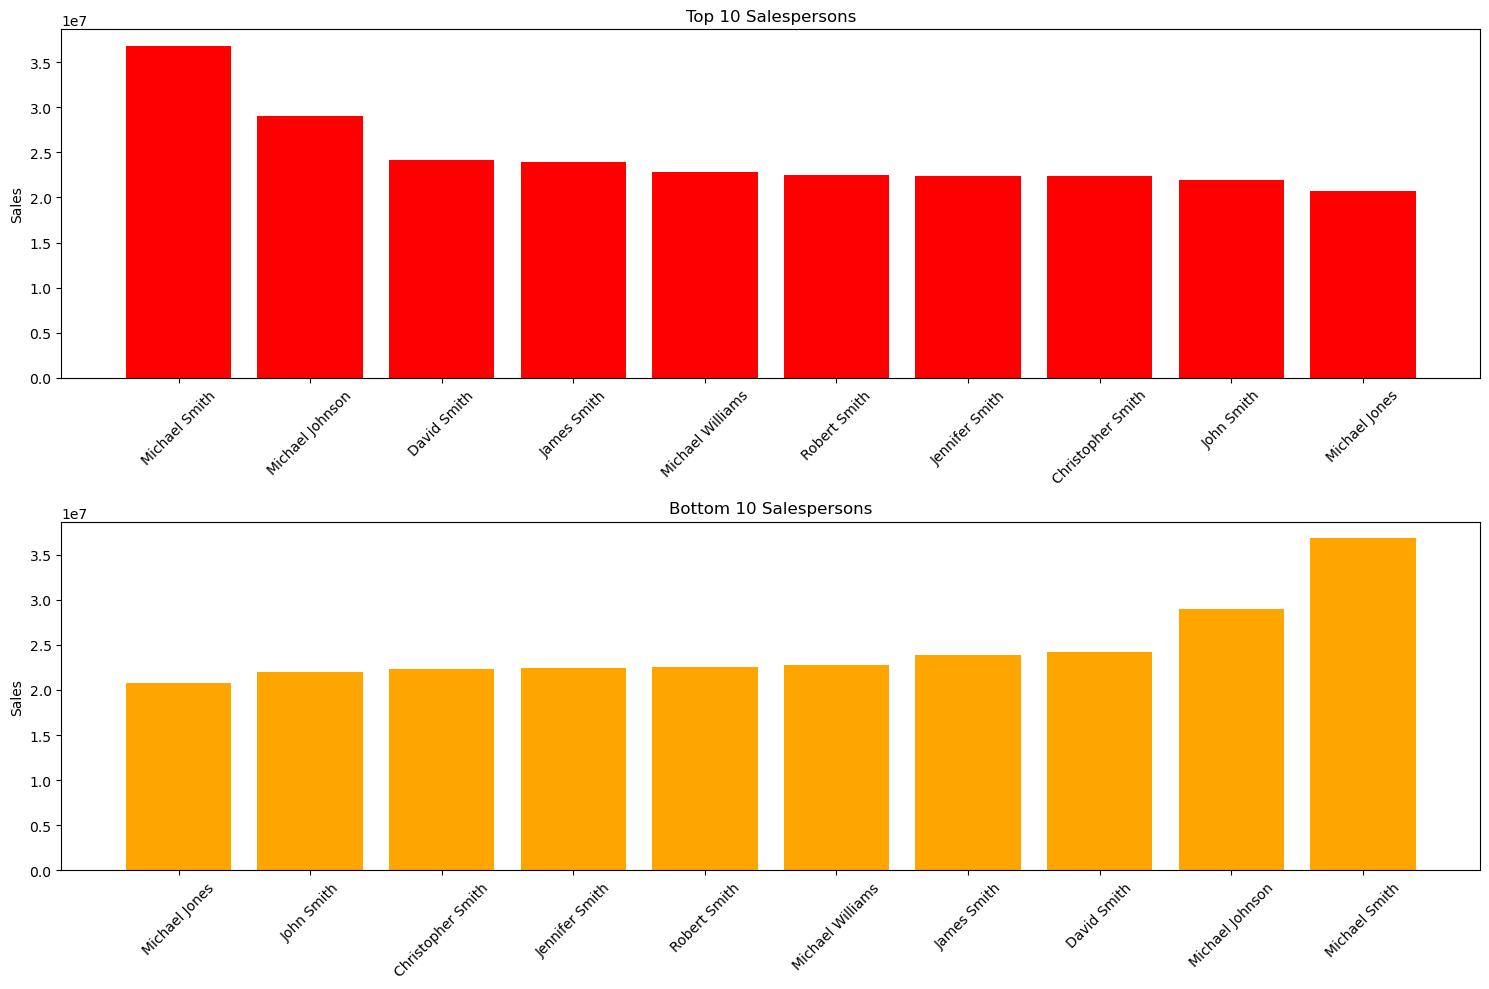

In [13]:
top10 = df.groupby('Salesperson')['Sale Price'].sum().sort_values(ascending=False).head(10)
bottom10=df.groupby('Salesperson')['Sale Price'].sum().sort_values(ascending=True).tail(10)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))


axes[0].bar(top10.index, top10.values, color='red')
axes[0].set_title('Top 10 Salespersons')
axes[0].set_ylabel('Sales')
axes[0].tick_params(axis='x', rotation=45)


axes[1].bar(bottom10.index, bottom10.values, color='orange')
axes[1].set_title('Bottom 10 Salespersons')
axes[1].set_ylabel('Sales')
axes[1].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()



From the above bar chart we could make out that the Topmost Salemen was Micheal Smith with over 3.5 million dollars of sales while the one with the lowest sale was Michael Jones with a sales of little more than 2 and less than 2.4 million dollars.

#### Top selling car brand

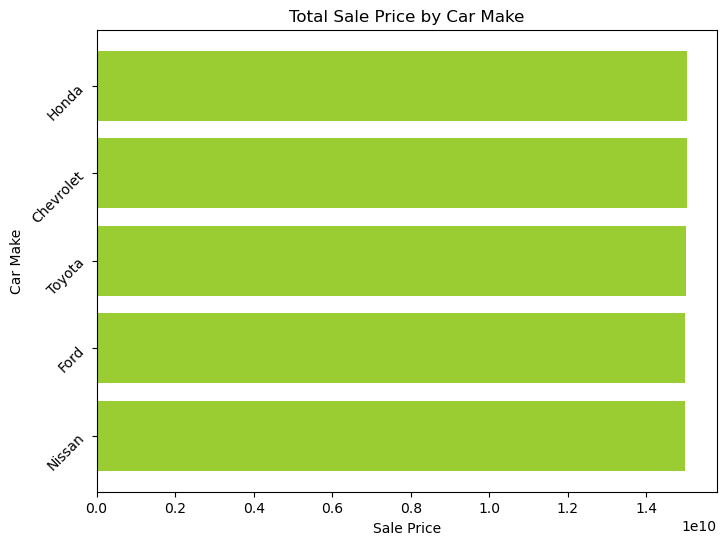

In [14]:
Car_Sales = df.groupby('Car Make')['Sale Price'].sum().sort_values(ascending=True).reset_index()

plt.figure(figsize=(8, 6))

plt.barh(y='Car Make', width='Sale Price', data=Car_Sales, color="yellowgreen")
plt.xlabel('Sale Price')
plt.ylabel('Car Make')
plt.yticks(rotation=45)
plt.title('Total Sale Price by Car Make')

plt.show()


Honda is the made the most seling car brand

#### **Top Customer based on Total amount Spent on Car Purchases**

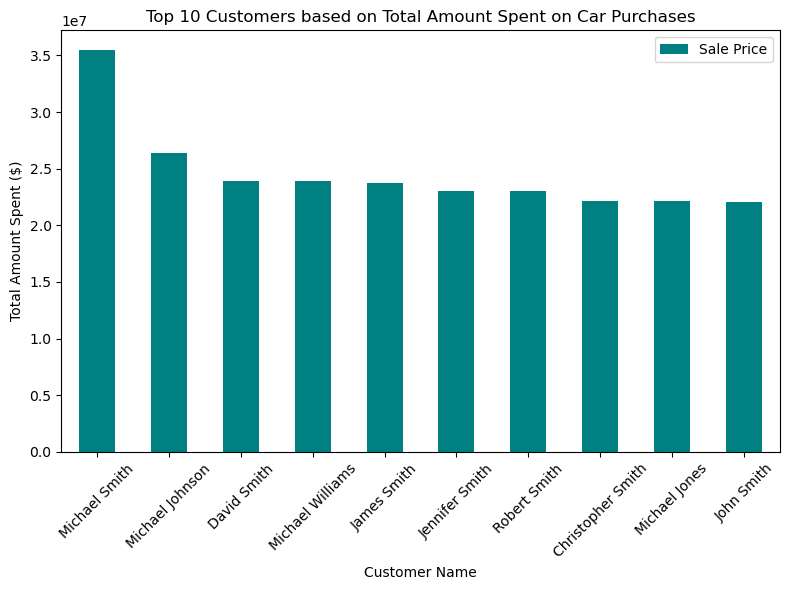

In [15]:
customer_spending = df.groupby('Customer Name')['Sale Price'].sum()
top_customers = customer_spending.sort_values(ascending=False).head(10) 
plt.figure(figsize=(8, 6))
top_customers.plot(kind='bar', color='Teal')
plt.title('Top 10 Customers based on Total Amount Spent on Car Purchases')
plt.xlabel('Customer Name')
plt.ylabel('Total Amount Spent ($)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Micheal Smith the person who was the top buyer of cars by spending almost 3.5 million dollars.

In [16]:
df.head()

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned,Month,Year
0,2022-08-01,Monica Moore MD,Mary Butler,Nissan,Altima,2018,15983,0.070495,1126.73,8,2022
1,2023-03-15,Roberto Rose,Richard Pierce,Nissan,F-150,2016,38474,0.134439,5172.40,3,2023
2,2023-04-29,Ashley Ramos,Sandra Moore,Ford,Civic,2016,33340,0.114536,3818.63,4,2023
3,2022-09-04,Patrick Harris,Johnny Scott,Ford,Altima,2013,41937,0.092191,3866.20,9,2022
4,2022-06-16,Eric Lopez,Vanessa Jones,Honda,Silverado,2022,20256,0.113490,2298.85,6,2022


#### Most Preferred Car Model

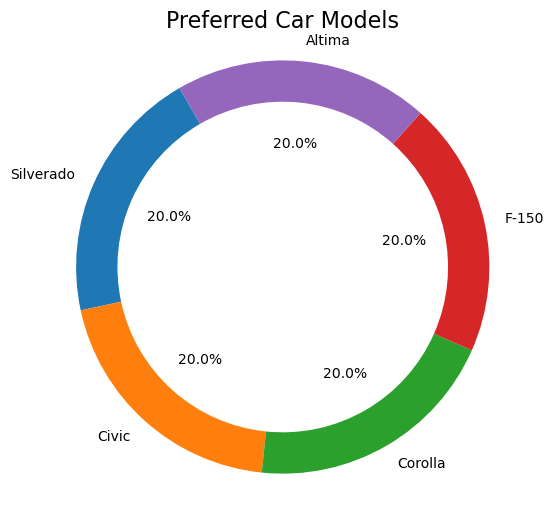

In [17]:
df['Car Model'].unique()
popular_car = df['Car Model'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)  
plt.pie(popular_car, labels=popular_car.index, autopct='%1.1f%%', startangle=120,wedgeprops={'width': 0.2})
plt.title('Preferred Car Models', fontsize=16)  
plt.axis('equal')  
plt.tick_params(labelsize=12)  


Out of all the cars available the most preferred one were Civic, Corolla, Silverado, F-150 and Altima.

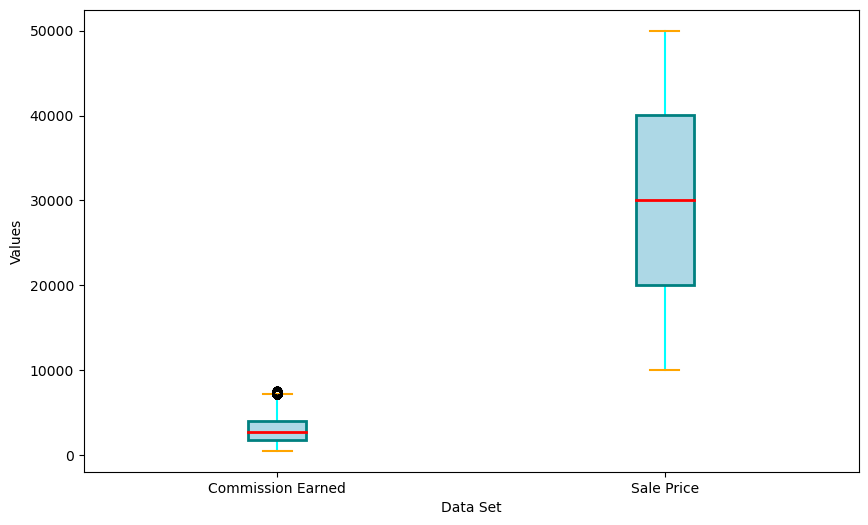

In [18]:
plt.figure(figsize=(10,6))
boxprops = {'facecolor': 'lightblue', 'edgecolor': 'teal', 'linewidth': 2.0}
whiskerprops = {'color': 'cyan', 'linewidth': 1.5}
capprops = {'color': 'orange', 'linewidth': 1.5}
medianprops = {'color': 'red', 'linewidth': 2}


y=df['Commission Earned']
z=df['Sale Price']
data=[y,z]
labels = ['Commission Earned', 'Sale Price']
plt.boxplot(data,labels=labels,patch_artist=True,
            boxprops=boxprops,
            whiskerprops=whiskerprops,
            capprops=capprops,
            medianprops=medianprops)
plt.xlabel('Data Set')
plt.ylabel('Values')
plt.show()

According to the box plot we could infer that the commission earned was between the range of 0 to 8000 with median value of about 2000 to 3000 and the Sale Price was between 10000 to 50000 with median of almost 30000.


#### Most prefered months for car purchase

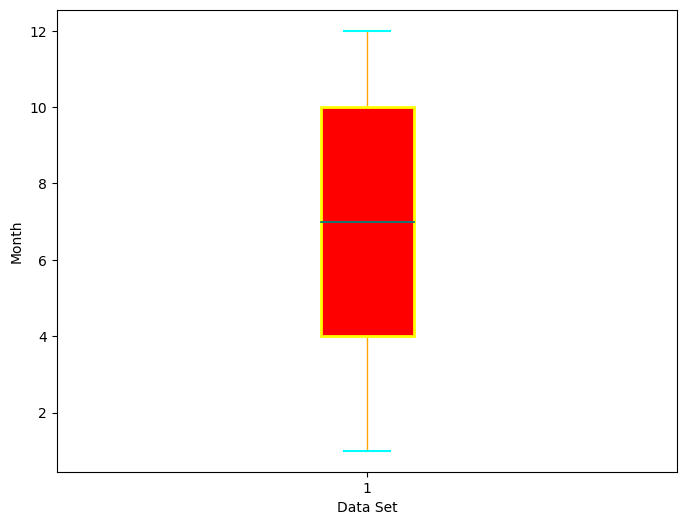

In [23]:
plt.figure(figsize=(8,6))
boxprops = {'facecolor': 'red', 'edgecolor': 'yellow', 'linewidth': 2.0}
whiskerprops = {'color': 'orange', 'linewidth': 1.0}
capprops = {'color': 'cyan', 'linewidth': 1.5}
medianprops = {'color': 'Teal', 'linewidth': 1.3}


x=df['Month']

data=[x]

plt.boxplot(data,patch_artist=True,
            boxprops=boxprops,
            whiskerprops=whiskerprops,
            capprops=capprops,
            medianprops=medianprops)
plt.xlabel('Data Set')
plt.ylabel('Month')
plt.show()

most preferred month of car purchase is 7th month of the year that is the july month

## Conclusion


 Sales Trends: December 2022 recorded the highest sales, with relatively consistent levels observed throughout, except for a significant drop in May 2023.

-> Top Performing Salespersons: Salespersons like Michael Smith, Michael Johnson, and James Smith have contributed significantly to total sales revenue, demonstrating exceptional sales performance.

-> Bottom Performing Salespersons: Some salespersons have made modest sales, indicating potential for improvement in their sales strategies and performance.

-> Commission Rate and Commission Earned: A moderate positive correlation coefficient of 0.59 between commission rate and commission earned suggests that higher commission rates tend to result in higher earnings for salespersons.

->Top Customers: High-value customers like Michael Smith and Michael Johnson contribute significantly to total sales revenue, emphasizing their importance to the dealership.

-> preferred car buying month: July is considered as the median month for the purchase of car. 